In [76]:
import pandas as pd

In [77]:
df = pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [79]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [80]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

## Preprocessing dataset



In [81]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)

In [82]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day'] = df['pickup_datetime'].apply(lambda x: x.day)

In [83]:
df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
df['month'] = df['pickup_datetime'].apply(lambda x: x.month)
df['year'] = df['pickup_datetime'].apply(lambda x: x.year)
df['week_day'] = df['pickup_datetime'].apply(lambda x: x.weekday())

In [84]:
df

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,week_day
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,28,10,10,2012,6
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,14,1,3,2014,4
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,29,0,6,2009,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,20,14,5,2015,2


## Null values

In [85]:
df.isna().sum()

id                   0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
day                  0
hour                 0
month                0
year                 0
week_day             0
dtype: int64

In [86]:
df = df.dropna()

In [87]:
df.isna().sum()

id                   0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
day                  0
hour                 0
month                0
year                 0
week_day             0
dtype: int64

In [88]:
df = df[df['fare_amount']>0]
df = df[df['passenger_count']<8]

## Outliers

In [89]:
import seaborn as sns

<AxesSubplot:xlabel='fare_amount'>

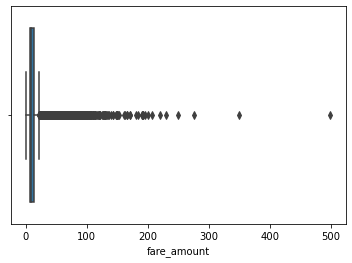

In [90]:
sns.boxplot(data=df,x='fare_amount')

In [91]:
import numpy as np
q1 = np.percentile(df['fare_amount'],25,interpolation='midpoint')
q3 = np.percentile(df['fare_amount'],75,interpolation='midpoint')
iqr = q3-q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

In [92]:
low

-3.75

In [93]:
high

22.25

In [94]:
outlier_indices = []
for i in range(len(df)):
    amt = df['fare_amount'].iloc[i]
    if low>amt or amt>high:
        outlier_indices.append(i)

In [95]:
len(outlier_indices)

17155

In [96]:
df = df.reset_index(drop=True)
df.drop(outlier_indices,inplace=True)
df = df.reset_index(drop=True)

In [98]:
df

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,week_day
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182816,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,31,14,1,2014,4
182817,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,28,10,10,2012,6
182818,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,14,1,3,2014,4
182819,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,20,14,5,2015,2


## Check correlation

<AxesSubplot:>

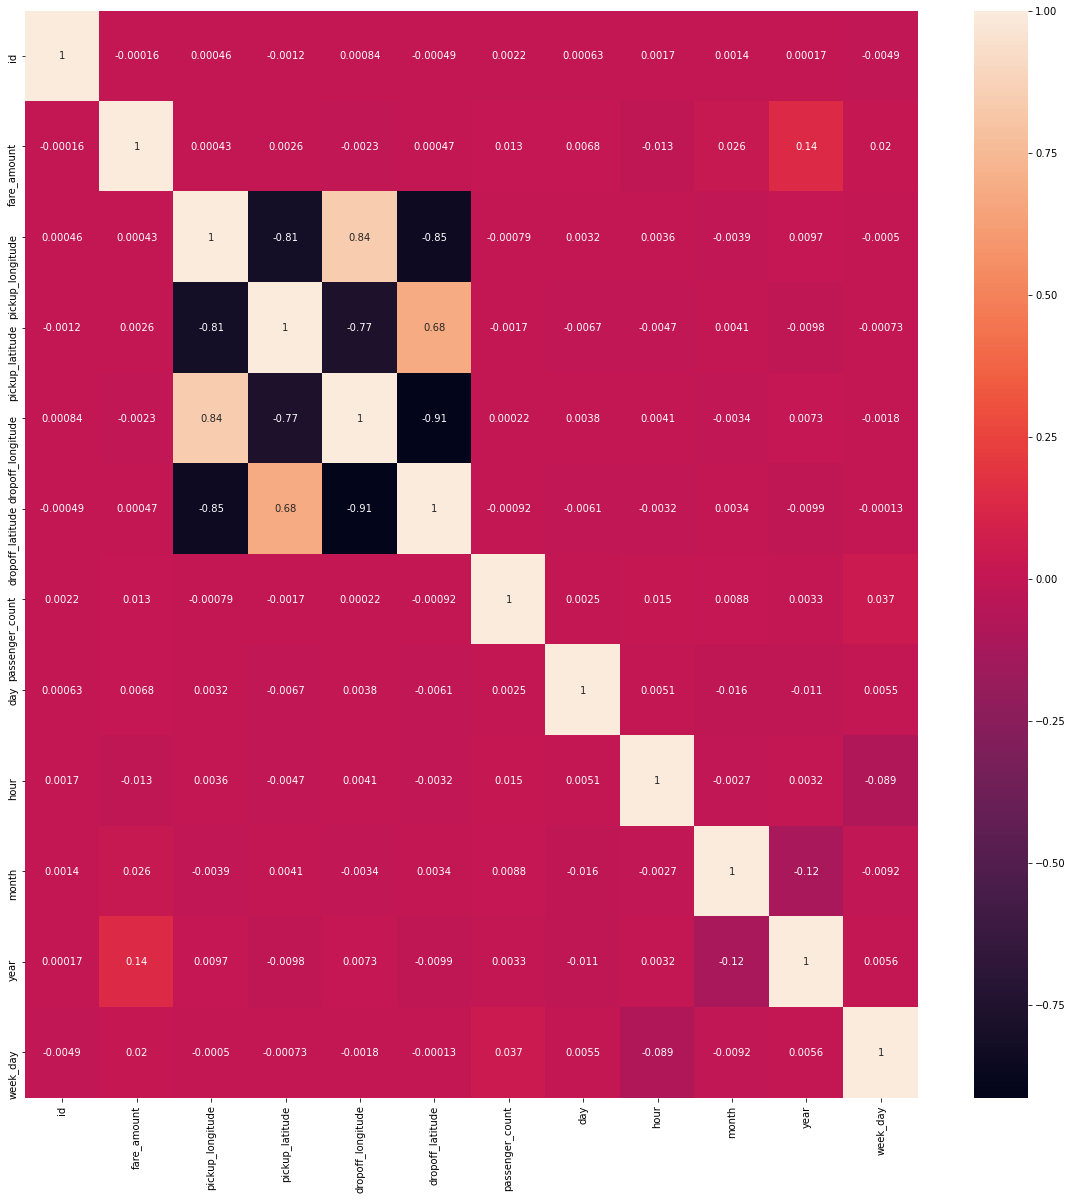

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [105]:
df.dtypes

id                                 int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
day                                int64
hour                               int64
month                              int64
year                               int64
week_day                           int64
dtype: object

In [106]:
df = df.drop(columns=['key','id','pickup_datetime'])

In [107]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,week_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
182816,12.0,-73.983070,40.760770,-73.972972,40.754177,1,31,14,1,2014,4
182817,3.0,-73.987042,40.739367,-73.986525,40.740297,1,28,10,10,2012,6
182818,7.5,-73.984722,40.736837,-74.006672,40.739620,1,14,1,3,2014,4
182819,14.5,-73.997124,40.725452,-73.983215,40.695415,1,20,14,5,2015,2


## Data split

In [108]:
from sklearn.model_selection import train_test_split

X = df.drop("fare_amount",axis=1)
y = df['fare_amount']

X_train,X_test,y_train,y_test = train_test_split(X,y)

## Scaling

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

## Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
linreg = LinearRegression().fit(X_train,y_train)

In [112]:
preds = linreg.predict(X_test)

In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [114]:
print("The mae is:" + str(mean_absolute_error(y_test,preds)))
print("The mse is:" + str(mean_squared_error(y_test,preds)))
print("The r2 score is:" + str(r2_score(y_test,preds)))

The mae is:3.259398911307773
The mse is:16.88665255641345
The r2 score is:0.019590137491668047


In [115]:
results_df = pd.DataFrame({'Actual':y_test,'Predicted':preds})
results_df

,Actual,Predicted
40537,4.0,9.298634
111735,10.5,8.022325
98972,12.5,9.526667
91029,16.0,9.260748
23604,8.1,8.710235
...,...,...
93683,9.7,7.874137
4491,4.5,8.922442
91496,8.0,9.205369
37627,6.9,8.879588


## Random Forest

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
reg = RandomForestRegressor().fit(X_train,y_train)
preds = reg.predict(X_test)

In [118]:
print("The mae is:" + str(mean_absolute_error(y_test,preds)))
print("The mse is:" + str(mean_squared_error(y_test,preds)))
print("The r2 score is:" + str(r2_score(y_test,preds)))

The mae is:1.4025618320924833
The mse is:4.270352732670684
The r2 score is:0.7520707007198023


In [119]:
results_df = pd.DataFrame({'Actual':y_test,'Predicted':preds})
results_df

,Actual,Predicted
40537,4.0,5.305
111735,10.5,12.475
98972,12.5,14.400
91029,16.0,11.409
23604,8.1,7.300
...,...,...
93683,9.7,10.898
4491,4.5,4.138
91496,8.0,8.450
37627,6.9,6.308
